In [1]:
from rtergpy.run import defaults, event, etime2name, src2ergs
from rtergpy.waveforms import get_respinv
from obspy import UTCDateTime
import pandas as pd

Defaults=defaults()
Event=event()
#Defaults.src='IRIS'
Defaults.src='RASPISHAKE'
Event.newData=False # True is default
Event.ecount='00'
edateold=""
# events older than available in NEIC
#CMTS=pd.read_csv('CMTS_NEIC.txt', sep='\s+', comment="#")  # any amount of whitespace
CMTS=pd.read_csv('test.txt', sep='\s+', comment="#")  # any amount of whitespace
for index, EQ in CMTS.iterrows():
    print(EQ)
    eloc = [EQ.LAT,EQ.LONG,EQ.DEPTH] 
    year,mo,dd = EQ.DATE.split('/')
    hh,mn,sec = EQ.TIME.split(':')
    if float(sec) >= 60:
        mn = int(mn) + 1
        sec = float(sec) - 60
    if int(mn) >= 60:
        hh = int(hh) + 1
        mn = int(mn) - 60
    etime=(UTCDateTime(int(year),int(mo),int(dd),int(hh),int(mn),float(sec)))
    # iterate ecount
    if EQ.DATE == edateold:
        Event.ecount=str(int(Event.ecount)+1).zfill(2)
    else:
        Event.ecount='00'
    edateold=EQ.DATE
    Event.eventname=etime2name(etime,ecount=Event.ecount)
    Event.origin=[eloc,etime]
    Event.focmech=[EQ.STK, EQ.DP, EQ.RKE] # phi,delta,lmbda

DATE                          2020/01/24
TIME                          17:55:14.1
LONG                               39.02
LAT                                38.29
DEPTH                               12.0
STK                                  245
DP                                    67
RKE                                  -10
Mom        180000000000000012012486656.0
Mw                                  6.76
CMTNAME                    202001241755A
Name: 0, dtype: object


In [2]:
 src2ergs(Defaults=Defaults,Event=Event)

Loading locally stored waveforms
Working directory now:  /Users/anewman/Documents/Projects/EQerg/rterg_events/events/2020/2020012400/00


/Users/anewman/opt/anaconda3/envs/leah_rtergpy/lib/python3.9/site-packages/rtergpy/run.py:175: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trdf=trdf.append(trstat2pd(tr),ignore_index=True)


Calculating Energy growth with time 
Running fband [0.00333333, 2.0] Hz:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.42it/s]


Running fband [0.5, 2.0] Hz:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.12it/s]


Length EBB and EHF 360 360
Calculating TACER Values


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.94it/s]


Median Tacer time = 8.5 -/+ 5.0/18.0 s (25/75th percentile)
From Median Tacer: --------------------------
  Mean BB Energy (Estimated)= 2.30e+14 [Me 6.67]
    1/300 - 2 Hz: 13 traces, 2.30e+14 +- 10^0.58 [J]
    1/2 - 2 Hz: 14 traces, 4.24e+12 +- 10^0.48 [J]
  Mean BB Energy (FM corrected) = 1.22e+15 [Me 7.16]
    1/300 - 2 Hz: 14 traces, 1.22e+15 +- 10^0.64 [J]
    1/2 - 2 Hz: 14 traces, 1.87e+13 +- 10^0.49 [J]
From Per-Station Tacer: ---------------------
  Mean BB Energy (Estimated)= 2.97e+14 [Me 6.75]
    1/300 - 2 Hz: 16 traces, 2.97e+14 +- 10^0.67 [J]
    1/2 - 2 Hz: 15 traces, 2.74e+12 +- 10^0.36 [J]
  Mean BB Energy (FM corrected) = 1.46e+15 [Me 7.21]
    1/300 - 2 Hz: 17 traces, 1.46e+15 +- 10^0.68 [J]
    1/2 - 2 Hz: 15 traces, 1.10e+13 +- 10^0.37 [J]
Making figures



/Users/anewman/opt/anaconda3/envs/leah_rtergpy/lib/python3.9/site-packages/rtergpy/plotting.py:209: RuntimeWarning: divide by zero encountered in log10
  enorm=np.log10(eint/emean)


writing results



In [2]:
from rtergpy.waveforms import getwaves,ErgsFromWaves,loadwaves,gmeanCut,tacer,tacerstats
from rtergpy.waveforms import trstat2pd,e2Me,eventdir
from rtergpy.plotting import tacerplot,Edistplot,Ehistogram,Eazplot, stationEmapPygmt, fbandlabels, Efluxplots
import numpy as np
import pandas as pd
import matplotlib as mpl
import os

In [4]:
prePtime=0-Defaults.waveparams[1][0] # 60 s default

edirit,origwd=eventdir(Defaults=Defaults,Event=Event,create=False,cd=True)

st,df=loadwaves(Defaults=Defaults,Event=Event) 
STATCHAN0=''
for tr in st:
    STATCHAN=str(tr.stats.network)+str(tr.stats.station)
    trWindow=UTCDateTime(tr.stats.endtime)-UTCDateTime(tr.stats.starttime)
    nDataExpected=trWindow*tr.stats.sampling_rate+1

    if STATCHAN == STATCHAN0:  # multiple sensors at same location
        st.remove(tr)
    elif trWindow < prePtime:  # too short a window
        st.remove(tr)
    elif tr.stats.npts < nDataExpected:  # less data than expected
        st.remove(tr)
        
    STATCHAN0=STATCHAN

# create an array of station data 
trdf=pd.DataFrame()
for tr in st:
    trdf=trdf.append(trstat2pd(tr), ignore_index=True)

Working directory now:  /Users/anewman/Documents/Projects/EQerg/rterg_events/events/2020/2020012400/00


/Users/anewman/tmp/ipykernel_73130/1622332823.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trdf=trdf.append(trstat2pd(tr), ignore_index=True)


In [5]:
#EBB,EHF,Emd=ErgsFromWaves(st,Defaults,Event)
from rtergpy.waveforms import wave2energytinc
i=0
for tr in st:
    #if i > 130:
    #    tr.plot()
    print(i)
    wave2energytinc(tr,Defaults=Defaults,Event=Event,fband=Defaults.waveparams[0][0])
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


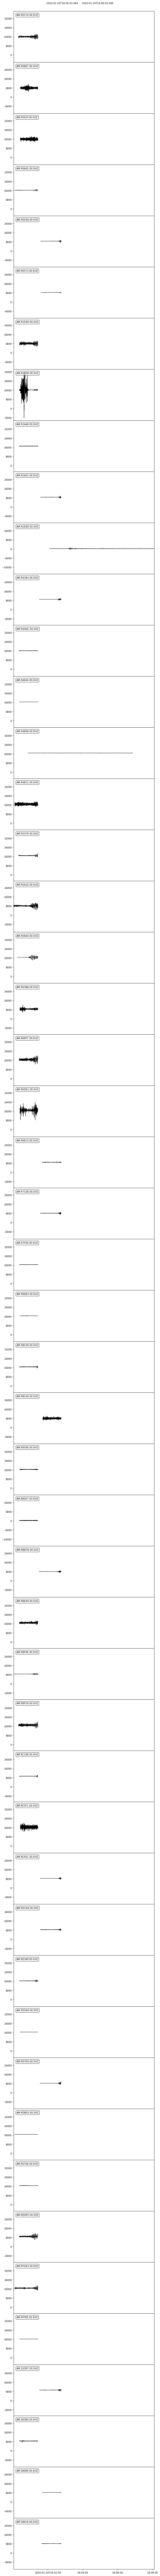

In [10]:
st.plot();

In [ ]:
print(i)